# Исследовательский анализ данных

## Проект: Определение возраста
**Dataset Description:**
    
   Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
 * Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы.
 * Контролировать добросовестность кассиров при продаже алкоголя.
    
**Данные:**
    
    Данные взяты с сайта ChaLearn Looking at People. Они находятся в папке /datasets/faces/.
 * `/final_files` - одна папка со всеми изображениями.
 * `labels.csv` - датасет с инфомацией о возрасте и именами файлов.
 
**Описание полей данных:**

    В файле `labels.csv` имеются следующие поля:
 * `file_name` - имя файла с изображением.
 * `real_age` - возраст, целевой признак.
 
**Цели:**
 
 * Разработка модели, которая по фотографии определит приблизительный возраст человека.
 
**Структура проекта:**
<div class="toc"><ul class="toc-item"><li><span><a href="#Проект:-Определение-возраста" data-toc-modified-id="Проект:-Определение-возраста-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проект: Определение возраста</a></span></li><li><span><a href="#Import,-constants" data-toc-modified-id="Import,-constants-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import, constants</a></span></li><li><span><a href="#Data-downloading" data-toc-modified-id="Data-downloading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data downloading</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Learning" data-toc-modified-id="Learning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Learning</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>
 
**Предмет исследования:**

    Фотографии людей и датасет с информацией о возрасте.

**Методы:**
* Загрузка и ознакомление с данными
* Exploratory data analysis
* Machine learning
* Сверточные нейронные сети


**Используемые библитеки:** 

* Numpy
* Pandas
* Keras
* Seaborn
* Matplotlib

## Import, constants

Импортируем необходимые библиотеки и объявим константы:

In [1]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import random
from PIL import Image

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

sns.set(rc={'figure.figsize':(11.7,8.27)})

RANDOM_SEED = 12345

pth = '/datasets/faces/labels.csv'

## Data downloading

Загрузим наши данные в переменную `data`:

In [2]:
data = pd.read_csv(pth)

Взглянем на первые 5 строк:

In [3]:
data.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


и на последние 5 строк:

In [4]:
data.tail()

,file_name,real_age
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20
7590,007612.jpg,47


Загрузка проведена корректно.
Посмотрим на общую информацию о датасете:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


В нашем роспоряжении 7591 строка с информацией о имени файла с изображением и возрастом:

* столбец `file_name` - тип данных `object`, пропущенных значений не обнаруженно.
* столбец `real_age` - тип данных `int64`, пропущенных значений не обнаруженно.

На этапе Data downloading мы оценили размеры данных и получили общую информацию.

## Exploratory data analysis

Для начала проверим датасет на дубликаты по колонке `file_name`:

In [6]:
count_duplicates = len(data) - len(data.file_name.unique())
 
if count_duplicates == 0:
    print('Дубликатов не обнаруженно')
else:
    print(f'Обнаруженно {count_duplicates} дубликатов')

Дубликатов не обнаруженно


Посмотрим на статистику:

In [7]:
data.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


* Минимальный возраст всего один год.
* Максимальный возраст 100 лет.
* Средний возраст 31 год.
* Медианный возраст 29 лет.

Изучим распределение количественное распределение возрастов:

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


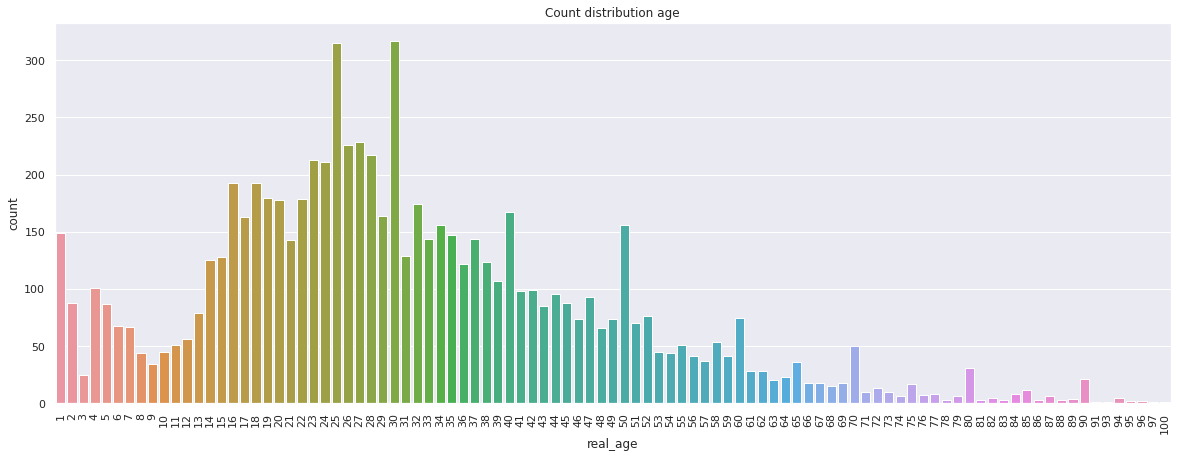

In [8]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(data.real_age).set_title('Count distribution age')
ax.set_xticklabels(data.real_age.sort_values().unique(), rotation=90);

Имеем данные о возрастах с нормальным распределением, наблюдаются пиковые значения в возрастах: 1, 25, 30, 40, 50, 60, 70, 80, 90 лет. Группа более 70 лет практически не представленна. Максимальный возраст составил 100 лет., минимальный 1 год.

Принимая во внимание поставленную задачу и ранее полученные сведения о количестве файлов с изображениями - текущих данных не достаточно для построения модели регрессии, т.к. на некоторый возраст приходиться менее 50 изображений, как частичную меры компенсации нехватки фотографий могу предложить:

* Поиск и выделение лиц на кадрах захваченными из системы видеонаблюдения - не рассматривается в рамках данного проекта.
* Аугментацию фото при помощи ImageDataGenerator(): наклоны и повороты изображений - внедрено в данном проекте на этапе компиляции модели.
* Аугментацию фото с различных ракурсов при помощи поворотов модели головы с помощью PRNet() - не рассматривается в рамках данного проекта, но очень актуально т.к. люди в магазине не позируют на камеру и расположения камер видеонаблюдения предпологает съемку лица сверху.

Взглянем на несколько фотографий каждого диапазона возрастов:
 * 1-5 лет
 * 15-18 лет
 * 20-23 года
 * 40-43 года
 * 60-63 года

In [9]:
age_dict = {'1-5': list(range(1, 6)),
            '15-18': list(range(15, 19)),
            '20-23': list(range(20, 24)),
            '40-43': list(range(40, 44)),
            '60-63': list(range(60, 64))
           }

Возраст 1-5


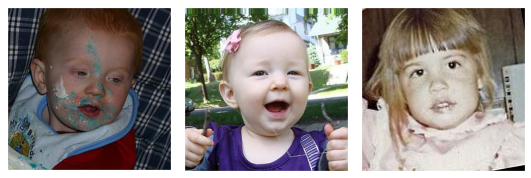

Возраст 15-18


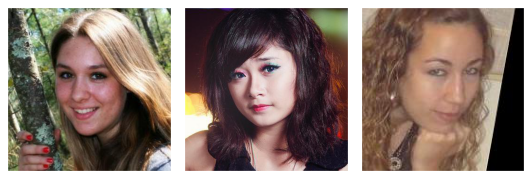

Возраст 20-23


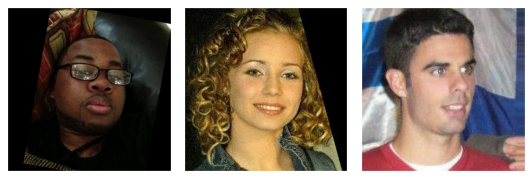

Возраст 40-43


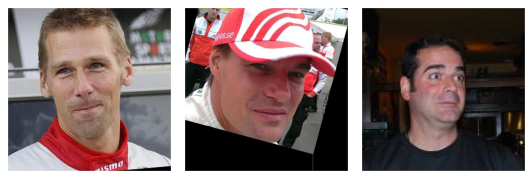

Возраст 60-63


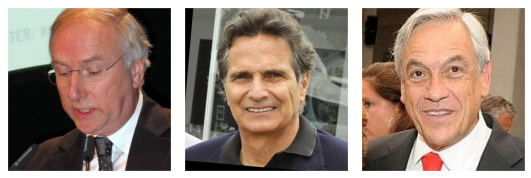

In [10]:
for age_name, age_list in age_dict.items():
    path_list = []
    print(f'Возраст {age_name}')
    
    for age in age_list:
        random_index = random.randint(2, 20)
        path_list.append('/datasets/faces/final_files/' + data.loc[data.real_age == age]['file_name'][random_index-1:random_index].values[0])
    
    fig = plt.figure(figsize=(10,10))
    for i in range(3):
        fig.add_subplot(4, 4, i+1)
        plt.imshow(Image.open(path_list[i]))
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
    plt.show()

Разметка данных выглядит адекватной.

На этапе EDA мы проанализировали общую статистичискую информацию о данных:

* Минимальный возраст всего один год.
* Максимальный возраст 100 лет.
* Средний возраст 31 год.
* Медианный возраст 29 лет.

Посмотрели на распределение данных в разрезе возраста:

Имеем данные о возрастах с нормальным распределением, наблюдаются пиковые значения в возрастах: 1, 25, 30, 40, 50, 60, 70, 80, 90 лет. Группа более 70 лет практически не представленна. Максимальный возраст составил 100 лет., минимальный 1 год.

Принимая во внимание поставленную задачу и ранее полученные сведения о количестве файлов с изображениями - текущих данных не достаточно для построения модели регрессии, т.к. на некоторый возраст приходиться менее 50 изображений, как частичную меры компенсации нехватки фотографий могу предложить:

* Поиск и выделение лиц на кадрах захваченными из системы видеонаблюдения - не рассматривается в рамках данного проекта.
* Аугментацию изображений при помощи ImageDataGenerator(): наклоны и повороты изображений - внедрено в данном проекте на этапе компиляции модели.
* Аугментацию изображений с различных ракурсов при помощи поворотов модели головы с помощью PRNet() - не рассматривается в рамках данного проекта, но очень актуально т.к. люди в магазине не позируют на камеру и расположения камер видеонаблюдения предпологает съемку лица сверху.

Оценили что наши даннын размечены адекватно.

## Modeling

На данном этапе мы создадим модель сверточной нейронной сети на базе модели ResNet50, при выключенных последних слоях, с добавлением слоев:
* Dropout(0.2)
* GlobalAveragePooling2D()
* Dense(1, activation='relu')

В качестве функции потерь и метрики используем MAE, оптимизатор Adam со скоростью обучения (0.0004).
Загрузку данных в модель будем производить при помощи ImageDataGenerator().

Код компиляции модели:

## Learning

Обучение производим в тренажере Яндекса, лог:

После обучения и тестирования на 17 эпохах и 16-ом размере батча, мы получили значение метрики MAE равное 6.7702 что удовлетворяет условиям задачи.

## General conclusion

В данном проекте нашей задачей являлась разработка модели предсказания возраста по изображению лица.

На начальном этапе мы импортировали необходимые библиотеки и объявили константы.
    
Затем мы загрузили данные об именах файлов изображений и возраста, убедились что данны имеют требуемые типы, проверили на дубликаты.
    
Также в рамках данного проекта мы проанализировали количественное распределение фотографий в разрезе возраста.
    
Мы заметили что в датасете есть пики преобладание фотографий в районе возраста 1, 16 и 26 лет.

После этого мы проверили разметку данных, посредством слуйчайной подвыборки по 3 фотографии пяти диапазонов возрастов - разметка данных выглядит адекватно.

На этапе Нмоделирования мы создали модель сверточной нейронной сети на базе модели ResNet50, при выключенных последних слоях, с добавлением своих слоев.

Провели обучение и тестирование модели на сервере Яндекса и добились метрики MAE равное 6.0236 что удовлетворяет условиям задачи.